# TODO:

- store output of state vars in xarray-simlab data structure
    1. for gekko solver
    2. for odeint solver
    3. for step-wise solver
    
this needs to be completely wrapped in the backend..
i need to somehow combine the "core.parts" so that they are automatically initialized with the xs.Model

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import xsimlab as xs

# to measure process time
import time as tm

In [2]:
from xsimlab.monitoring import ProgressBar

In [3]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra

phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert


In [4]:
from phydra.processes.main import ModelCore, Solver

from phydra.processes.statevars import SV, Time

from phydra.processes.fluxes import Flux

In [5]:
Model = phydra.create({'core':ModelCore, 'solver':Solver, 'time':Time, 'y':SV, 'loss':Flux})

In [6]:
Model

<xsimlab.Model (5 processes, 4 inputs)>
core
    solver_type     [in]
time
    days            [in] ('days',) time in days
y
    init            [in]
loss
    k               [in]
solver

In [7]:
odeint_setup = phydra.setup('odeint', Model,
            time=np.arange(0,20,0.01),
            input_vars={
                'y__init':0.5,
                'loss__k':0.5
            },
            output_vars={
                'y__value':None,
            })

In [8]:
gekko_setup = phydra.setup('gekko', Model,
            time=np.arange(0,20,0.01),
            input_vars={
                'y__init':0.5,
                'loss__k':0.5
            },
            output_vars={
                'y__value':None,
            })

In [9]:
stepwise_setup = phydra.setup('stepwise', Model,       
            time=np.arange(0,20,0.01),
            input_vars={
                'y__init':0.5,
                'loss__k':0.5
            },
            output_vars={
                'y__value':None,
            })

{'y__init': 0.5, 'loss__k': 0.5, 'core__solver_type': 'stepwise'} <class 'dict'>


In [10]:
stepwise_setup


<xarray.Dataset>
Dimensions:            (days: 1, time: 2000)
Coordinates:
  * time               (time) float64 0.0 0.01 0.02 0.03 ... 19.97 19.98 19.99
Dimensions without coordinates: days
Data variables:
    y__init            float64 0.5
    loss__k            float64 0.5
    core__solver_type  <U8 'stepwise'
    time__days         (days) int64 0
Attributes:
    __xsimlab_output_vars__:  y__value

In [11]:
with ProgressBar(frontend="console"):
        #out_ds = odeint_setup.xsimlab.run(model=Model)
        #out_ds1 = gekko_setup.xsimlab.run(model=Model)
        out_ds2 = stepwise_setup.xsimlab.run(model=Model)

▊            8% | run step 151/1999 

initializing model core
Initializing Model Time
{('y', 'init'): 0.5, ('loss', 'k'): 0.5, ('core', 'solver_type'): 'stepwise', ('time', 'days'): array([0]), ('core', 'm'): Model contains: 
 SVs:defaultdict(None, {}) 
 Params:defaultdict(None, {})
 Forcings:defaultdict(None, {})
 Fluxes:defaultdict(<class 'list'>, {})}
X [0]
SV_SETUP time
initializing state variable y
SV_SETUP y
initializing state variable loss
assembling model
SOLVER : stepwise
STEPWISE Model Assembly


██████████ 100% | Simulation finished in 00:02 


finalizing: cleanup


In [12]:
out_ds

NameError: name 'out_ds' is not defined

In [13]:
out_ds.y__value.plot()

NameError: name 'out_ds' is not defined

In [14]:
out_ds1

NameError: name 'out_ds1' is not defined

In [15]:
out_ds1.y__value.plot()

NameError: name 'out_ds1' is not defined

In [16]:
out_ds2

<xarray.Dataset>
Dimensions:            (days: 1, time: 2000)
Coordinates:
  * time               (time) float64 0.0 0.01 0.02 0.03 ... 19.97 19.98 19.99
Dimensions without coordinates: days
Data variables:
    core__solver_type  <U8 'stepwise'
    loss__k            float64 0.5
    time__days         (days) int64 0
    y__init            float64 0.5
    y__value           (time) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5

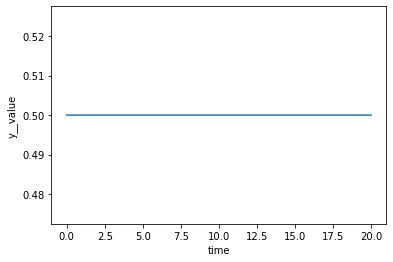

In [17]:
out_ds2.y__value.plot()